In [1]:
# Libraries ----
import sys
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import matplotlib.ticker as mtick  # type: ignore

from hoi.plot import plot_landscape  # type: ignore
from hoi.utils import get_nbest_mult  # type: ignore

# Import the O-information and dynamic O-information
from hoi.metrics import Oinfo, GradientOinfo  # type: ignore

sys.path.append('../modules')
import misc_functions as mf  # type: ignore
import estimate_complex_network_analysis as ecna  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
input_generation_date = "2025-02-18"

video_2n = "2n_0m_2f_230330_1"
video_3n = "3n_0m_3f_230404_1"
video_4n = "4n_4m_0f_230523_2"
x_bounds = [0, 1080]
y_bounds = [0, 1920]

## Load data

In [3]:
df_2n = pd.read_csv("{}/reviewed_{}.csv".format(input_path, video_2n), low_memory=False)
df_3n = pd.read_csv("{}/reviewed_{}.csv".format(input_path, video_3n), low_memory=False)
df_4n = pd.read_csv("{}/reviewed_{}.csv".format(input_path, video_4n), low_memory=False)

## Estimate distances between individuals

In [4]:
df_distances_2n = mf.estimate_distances(df=df_2n, filter_step=None)
df_distances_3n = mf.estimate_distances(df=df_3n, filter_step=None)
df_distances_4n = mf.estimate_distances(df=df_4n, filter_step=3)

Estimate distances for: 2 ids
- Pair: 01

Estimate distances for: 3 ids
- Pair: 01
- Pair: 02
- Pair: 12

Estimate distances for: 4 ids
- Pair: 01
- Pair: 02
- Pair: 03
- Pair: 12
- Pair: 13
- Pair: 23
-- Skipped data every 3 points



## Plot distances between individuals

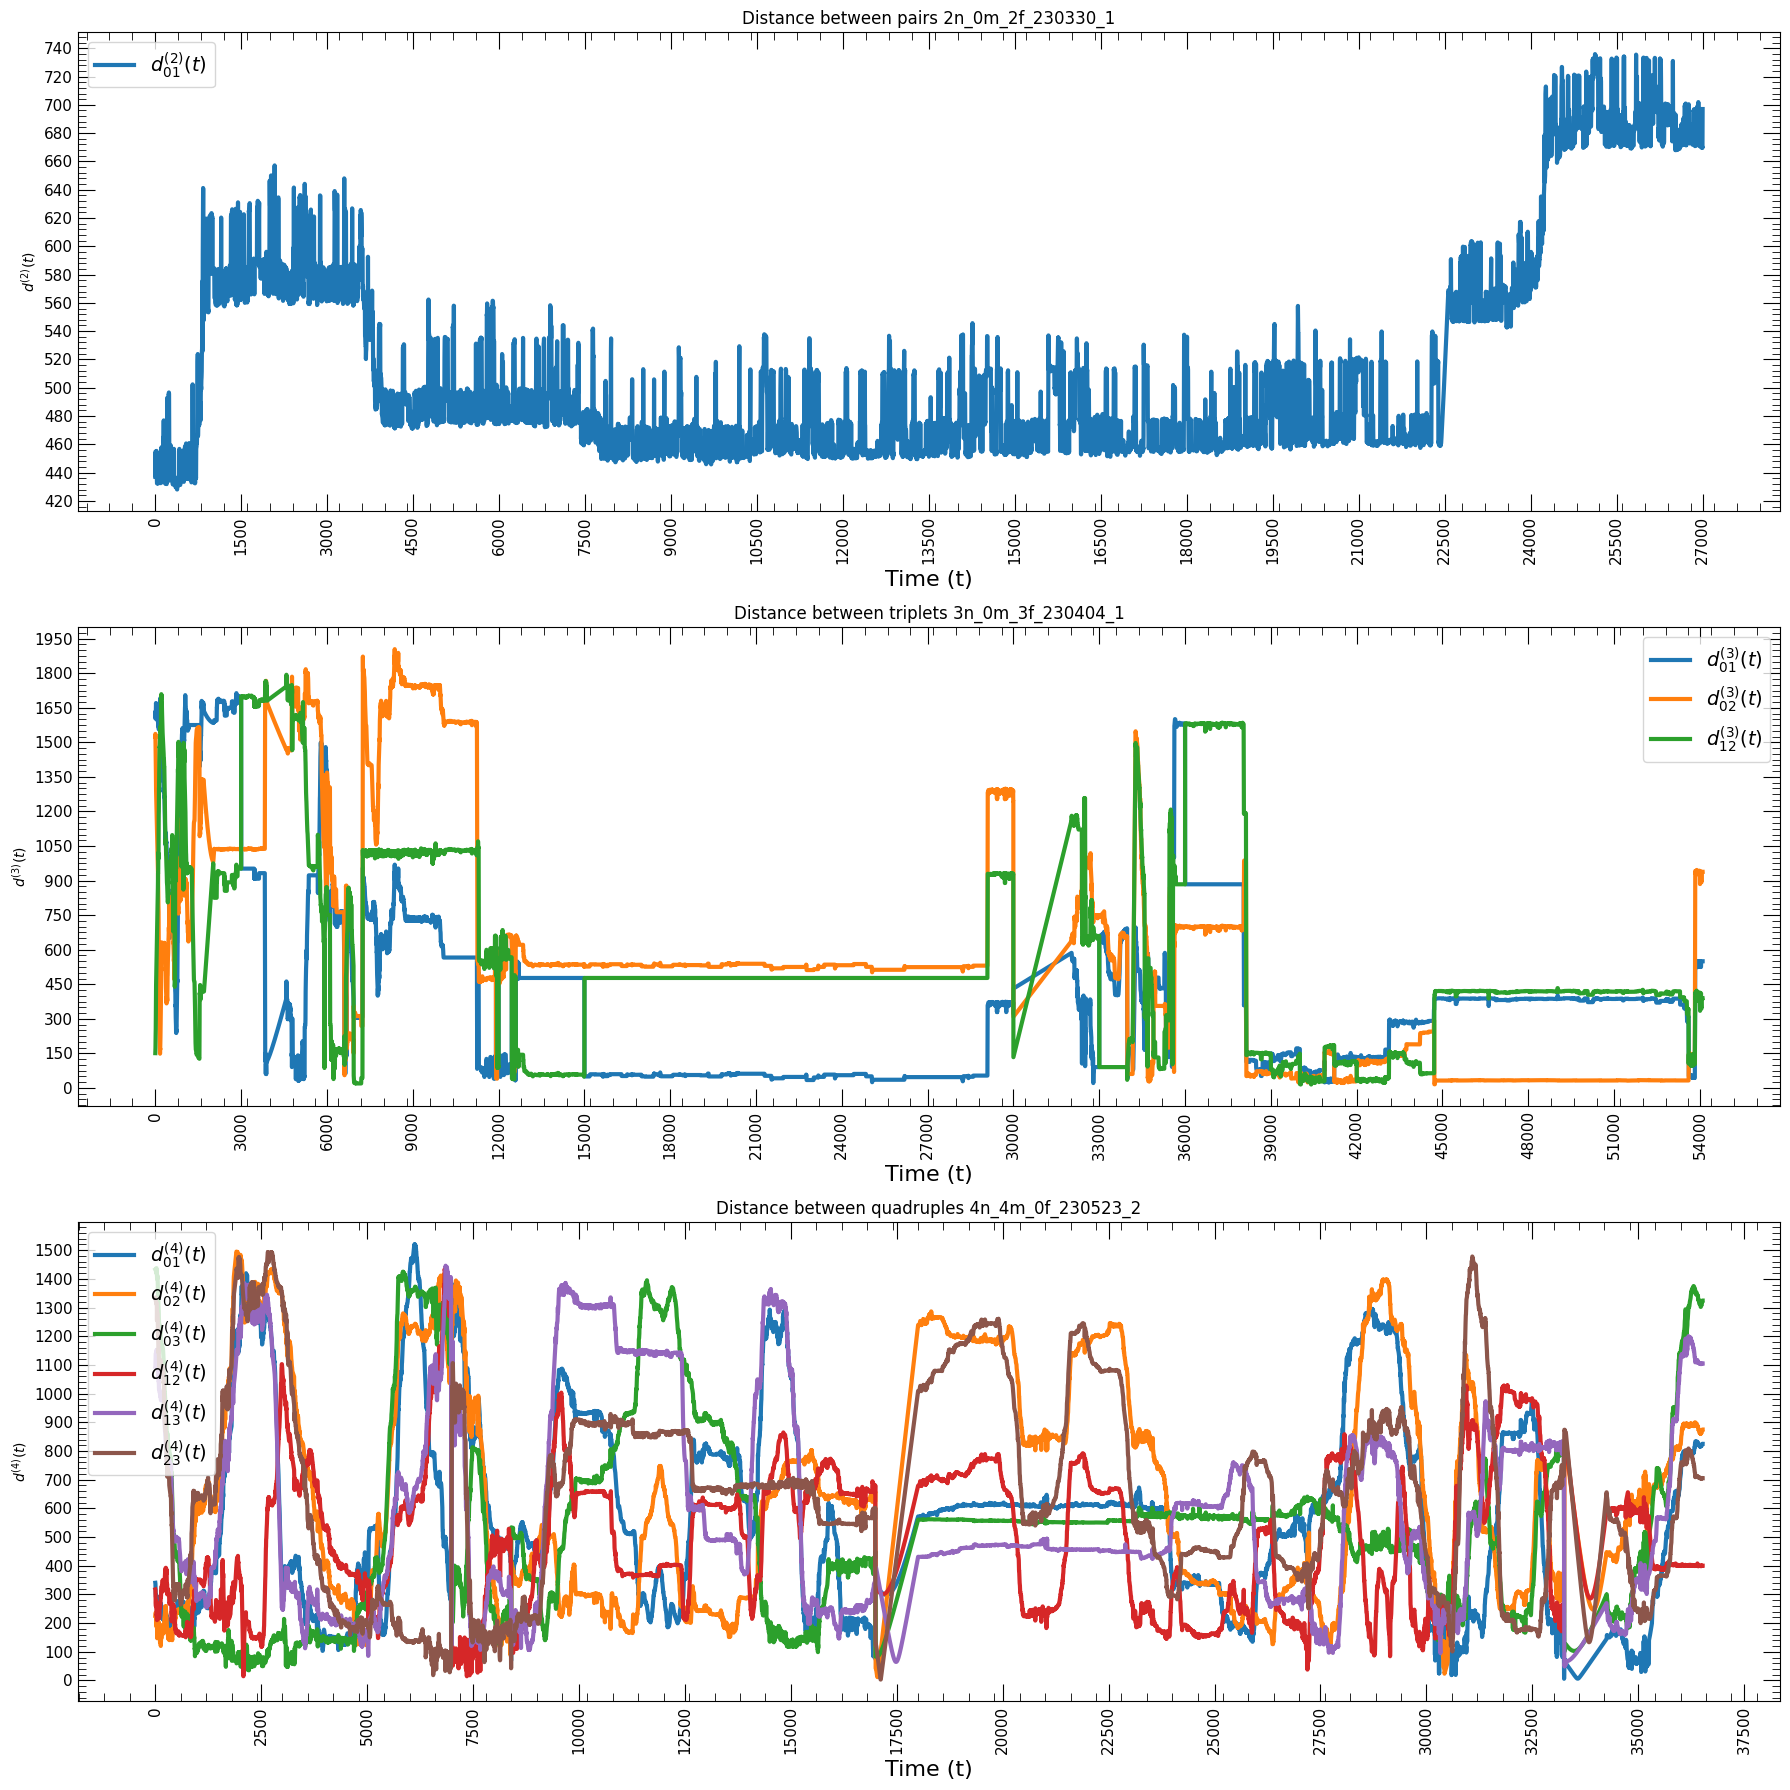

In [5]:
n_x_breaks, n_y_breaks = 20, 20
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

# Distances for 2 individuals ----
t_2n = df_distances_2n["time"].unique()
d01_2n = df_distances_2n[df_distances_2n["id_pair"] == "01"]["distance"].values

# Distances for 3 individuals ----
t_3n = df_distances_3n["time"].unique()
d01_3n = df_distances_3n[df_distances_3n["id_pair"] == "01"]["distance"].values
d02_3n = df_distances_3n[df_distances_3n["id_pair"] == "02"]["distance"].values
d12_3n = df_distances_3n[df_distances_3n["id_pair"] == "12"]["distance"].values

# Distances for 4 individuals ----
t_4n = df_distances_4n["time"].unique()
d01_4n = df_distances_4n[df_distances_4n["id_pair"] == "01"]["distance"].values
d02_4n = df_distances_4n[df_distances_4n["id_pair"] == "02"]["distance"].values
d03_4n = df_distances_4n[df_distances_4n["id_pair"] == "03"]["distance"].values
d12_4n = df_distances_4n[df_distances_4n["id_pair"] == "12"]["distance"].values
d13_4n = df_distances_4n[df_distances_4n["id_pair"] == "13"]["distance"].values
d23_4n = df_distances_4n[df_distances_4n["id_pair"] == "23"]["distance"].values

# Plot for 2 individuals ----
axes[0].plot(t_2n, d01_2n, label="$d_{{01}}^{{(2)}}(t)$", ls="solid", lw=3)
axes[0].set_ylabel("$d^{{(2)}}(t)$")
axes[0].set_xlabel("Time (t)", fontsize=16)
axes[0].set_title("Distance between pairs {}".format(video_2n))

# Plot for 3 individuals ----
axes[1].plot(t_3n, d01_3n, label="$d_{{01}}^{{(3)}}(t)$", ls="solid", lw=3)
axes[1].plot(t_3n, d02_3n, label="$d_{{02}}^{{(3)}}(t)$", ls="solid", lw=3)
axes[1].plot(t_3n, d12_3n, label="$d_{{12}}^{{(3)}}(t)$", ls="solid", lw=3)
axes[1].set_ylabel("$d^{{(3)}}(t)$")
axes[1].set_xlabel("Time (t)", fontsize=16)
axes[1].set_title("Distance between triplets {}".format(video_3n))

# Plot for 4 individuals ----
axes[2].plot(t_4n, d01_4n, label="$d_{{01}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d02_4n, label="$d_{{02}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d03_4n, label="$d_{{03}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d12_4n, label="$d_{{12}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d13_4n, label="$d_{{13}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d23_4n, label="$d_{{23}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].set_ylabel("$d^{{(4)}}(t)$")
axes[2].set_xlabel("Time (t)", fontsize=16)
axes[2].set_title("Distance between quadruples {}".format(video_4n))

# Other plots settings ----
for j in [0, 1, 2]:
    axes[j].legend(fontsize=14)
    axes[j].tick_params(which = "major", direction = "in", top = True, right = True, labelsize = 11, length = 12)
    axes[j].tick_params(which = "minor", direction = "in", top = True, right = True, labelsize = 11, length = 6)
    axes[j].xaxis.set_major_locator(mtick.MaxNLocator(n_x_breaks))
    axes[j].xaxis.set_minor_locator(mtick.MaxNLocator(4 * n_x_breaks))
    axes[j].yaxis.set_major_locator(mtick.MaxNLocator(n_y_breaks))
    axes[j].yaxis.set_minor_locator(mtick.MaxNLocator(5 * n_y_breaks))
    axes[j].tick_params(axis = "x", labelrotation = 90)

plt.tight_layout()
plt.show()

# O-information

O-Information is a measure used in information theory to quantify **high-order interactions** in multivariate systems. It distinguishes between redundant and synergistic information sharing across multiple variables.

### **Mathematical Formulation**

For a set of random variables \(\{ X_1, X_2, ..., X_N \}\), the O-Information is defined as:

\begin{equation}
    \Omega(X_1, X_2, ..., X_N) = \sum_{i=1}^{N} I(X_i; \mathbf{X}_{-i}) - I(\mathbf{X}_1, ..., \mathbf{X}_N)
\end{equation}

where:

- $I(X_i; \mathbf{X}_{-i})$ is the mutual information between \(X_i\) and the rest.
- $I(\mathbf{X}_1, ..., \mathbf{X}_N)$ is the total multivariate mutual information.
- If $\Omega>0$, the system is redundancy-dominated.
- If $\Omega<0$, the system is synergy-dominated.


In [6]:
tf = 1000
data_oinfo_2n_3n = np.column_stack((
    # Pairs
    d01_2n[t_2n <= tf],
    # Triplets
    d01_3n[t_3n <= tf],
    d02_3n[t_3n <= tf],
    d12_3n[t_3n <= tf]
))

data_oinfo_3n_4n = np.column_stack((
    # Triplets
    d01_3n[t_3n <= tf].tolist(),
    d02_3n[t_3n <= tf].tolist(),
    d12_3n[t_3n <= tf].tolist(),
    # Quadruples
    d01_4n[t_4n <= tf].tolist(),
    d02_4n[t_4n <= tf].tolist(),
    d03_4n[t_4n <= tf].tolist(),
    d12_4n[t_4n <= tf].tolist(),
    d13_4n[t_4n <= tf].tolist(),
    d23_4n[t_4n <= tf].tolist()
))

# Define the model
model_1 = Oinfo(data_oinfo_2n_3n)  # O-information
model_2 = Oinfo(data_oinfo_3n_4n)  # O-information

# Compute hoi for multiplets with a minimum size of 3 and maximum size of 3
# using the Gaussian Copula entropy
hoi_1 = model_1.fit(minsize=3, maxsize=4, method="gc")
hoi_2 = model_2.fit(minsize=3, maxsize=4, method="gc")

# Plot the landscape
# plot_landscape(hoi_1, model=model_1)
# plot_landscape(hoi_2, model=model_2)

# Print the summary table
print("O-information summary")
print(get_nbest_mult(hoi_1, model=model_1))

print("\nO-information summary")
print(get_nbest_mult(hoi_2, model=model_2))

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/2 [00:00<?,       ?it/s]

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/2 [00:00<?,       ?it/s]

O-information summary
   index  order       hoi     multiplet
0      3      3  0.004536     [1, 2, 3]
1      0      3  0.001220     [0, 1, 2]
2      1      3 -0.006424     [0, 1, 3]
3      2      3 -0.236445     [0, 2, 3]
4      4      4 -0.251537  [0, 1, 2, 3]

O-information summary
   index  order       hoi     multiplet
0    207      4  0.870399  [4, 5, 7, 8]
1    131      4  0.739990  [0, 4, 5, 7]
2    205      4  0.623127  [4, 5, 6, 7]
3    186      4  0.612320  [2, 4, 5, 7]
4    166      4  0.609087  [1, 4, 5, 7]
5    169      4 -0.251802  [1, 4, 6, 8]
6    146      4 -0.264557  [1, 2, 4, 6]
7    154      4 -0.457930  [1, 2, 7, 8]
8    151      4 -0.466295  [1, 2, 5, 8]
9    148      4 -0.502190  [1, 2, 4, 8]


# Visibility Graph

The **Visibility Graph** ($VG$) is a method that transforms time series into a complex network, where data points in the series are mapped to nodes and edges are created based on visibility criteria.

### **Algorithm**

Given a time series $X = \{ x_1, x_2, ..., x_N \}$, two data points $(x_i, t_i)$ and $(x_j, t_j)$ are connected if any intermediate point $(x_k, t_k)$ satisfies:

\begin{equation}
    x_k < x_i + (x_j - x_i) \frac{t_k - t_i}{t_j - t_i}, \quad \forall k \in (i,j)
\end{equation}


In [7]:
upper_time = 1000

df_nx_2n, df_nx_nodes_2n, fig_2n, ax_2n = ecna.estimate_vg(
    df=df_2n,
    filter_step=3,
    width=21,
    height=7,
    n_x_breaks=20,
    n_y_breaks=20,
    fancy_legend=True,
    usetex=False,
    t_range=[0, upper_time]
)

df_nx_3n, df_nx_nodes_3n, fig_3n, ax_3n = ecna.estimate_vg(
    df=df_3n,
    filter_step=3,
    width=21,
    height=16,
    n_x_breaks=20,
    n_y_breaks=20,
    fancy_legend=True,
    usetex=False,
    t_range=[0, upper_time]
)

df_nx_4n, df_nx_nodes_4n, fig_4n, ax_4n = ecna.estimate_vg(
    df=df_4n,
    filter_step=3,
    width=21,
    height=30,
    n_x_breaks=20,
    n_y_breaks=20,
    fancy_legend=True,
    usetex=False,
    t_range=[0, upper_time]
)

Estimate distances for: 2 ids
- Pair: 01
-- Skipped data every 3 points

Estimate distances for: 3 ids
- Pair: 01
- Pair: 02
- Pair: 12
-- Skipped data every 3 points

Estimate distances for: 4 ids
- Pair: 01
- Pair: 02
- Pair: 03
- Pair: 12
- Pair: 13
- Pair: 23
-- Skipped data every 3 points



In [ ]:
df_nx_3n["std_deviation"] = df_nx_3n["heterogeneity"] * df_nx_3n["mean_degree"]
df_nx_3n["heterogeneity_2"] = df_nx_3n["heterogeneity"] ** 2
df_nx_3n
# Fitting negative binomial or poisson distribution or gamma distribution
# There is very far from randomness where heterogeneity ~1/<k> and our case, heterogeneity goes like ~<k>

# Simulation time series -> EDA (O-information)
# Eco
# SINDY
df_nx_3n

id_pair t_range  transitivity  avg_clustering  avg_shortest_path  \
0      01  0_1000      0.350654        0.621152           3.171261   
1      02  0_1000      0.464278        0.666108           2.571290   
2      12  0_1000      0.357520        0.608551           3.733848   

   maximum_degree  mean_degree  heterogeneity  diameter  radius  \
0             137    27.928144       0.871859         9       5   
1             125    31.017964       0.923788         5       3   
2             114    30.646707       0.873417        10       5   

   std_deviation  heterogeneity_2  
0      24.349395         0.760138  
1      28.654032         0.853385  
2      26.767367         0.762858

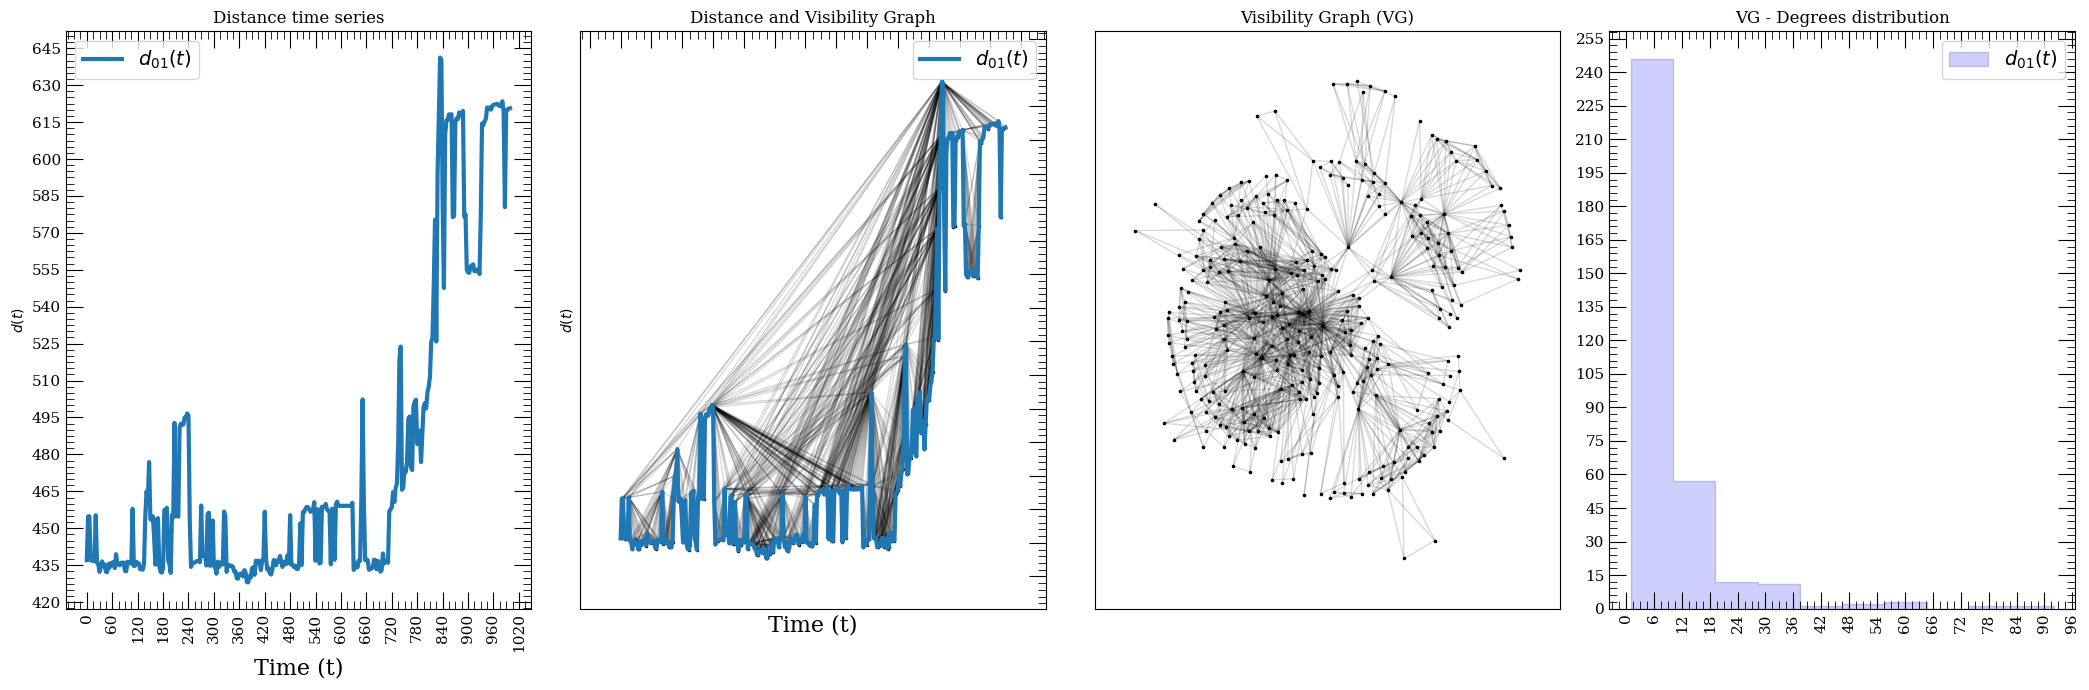

In [8]:
fig_2n

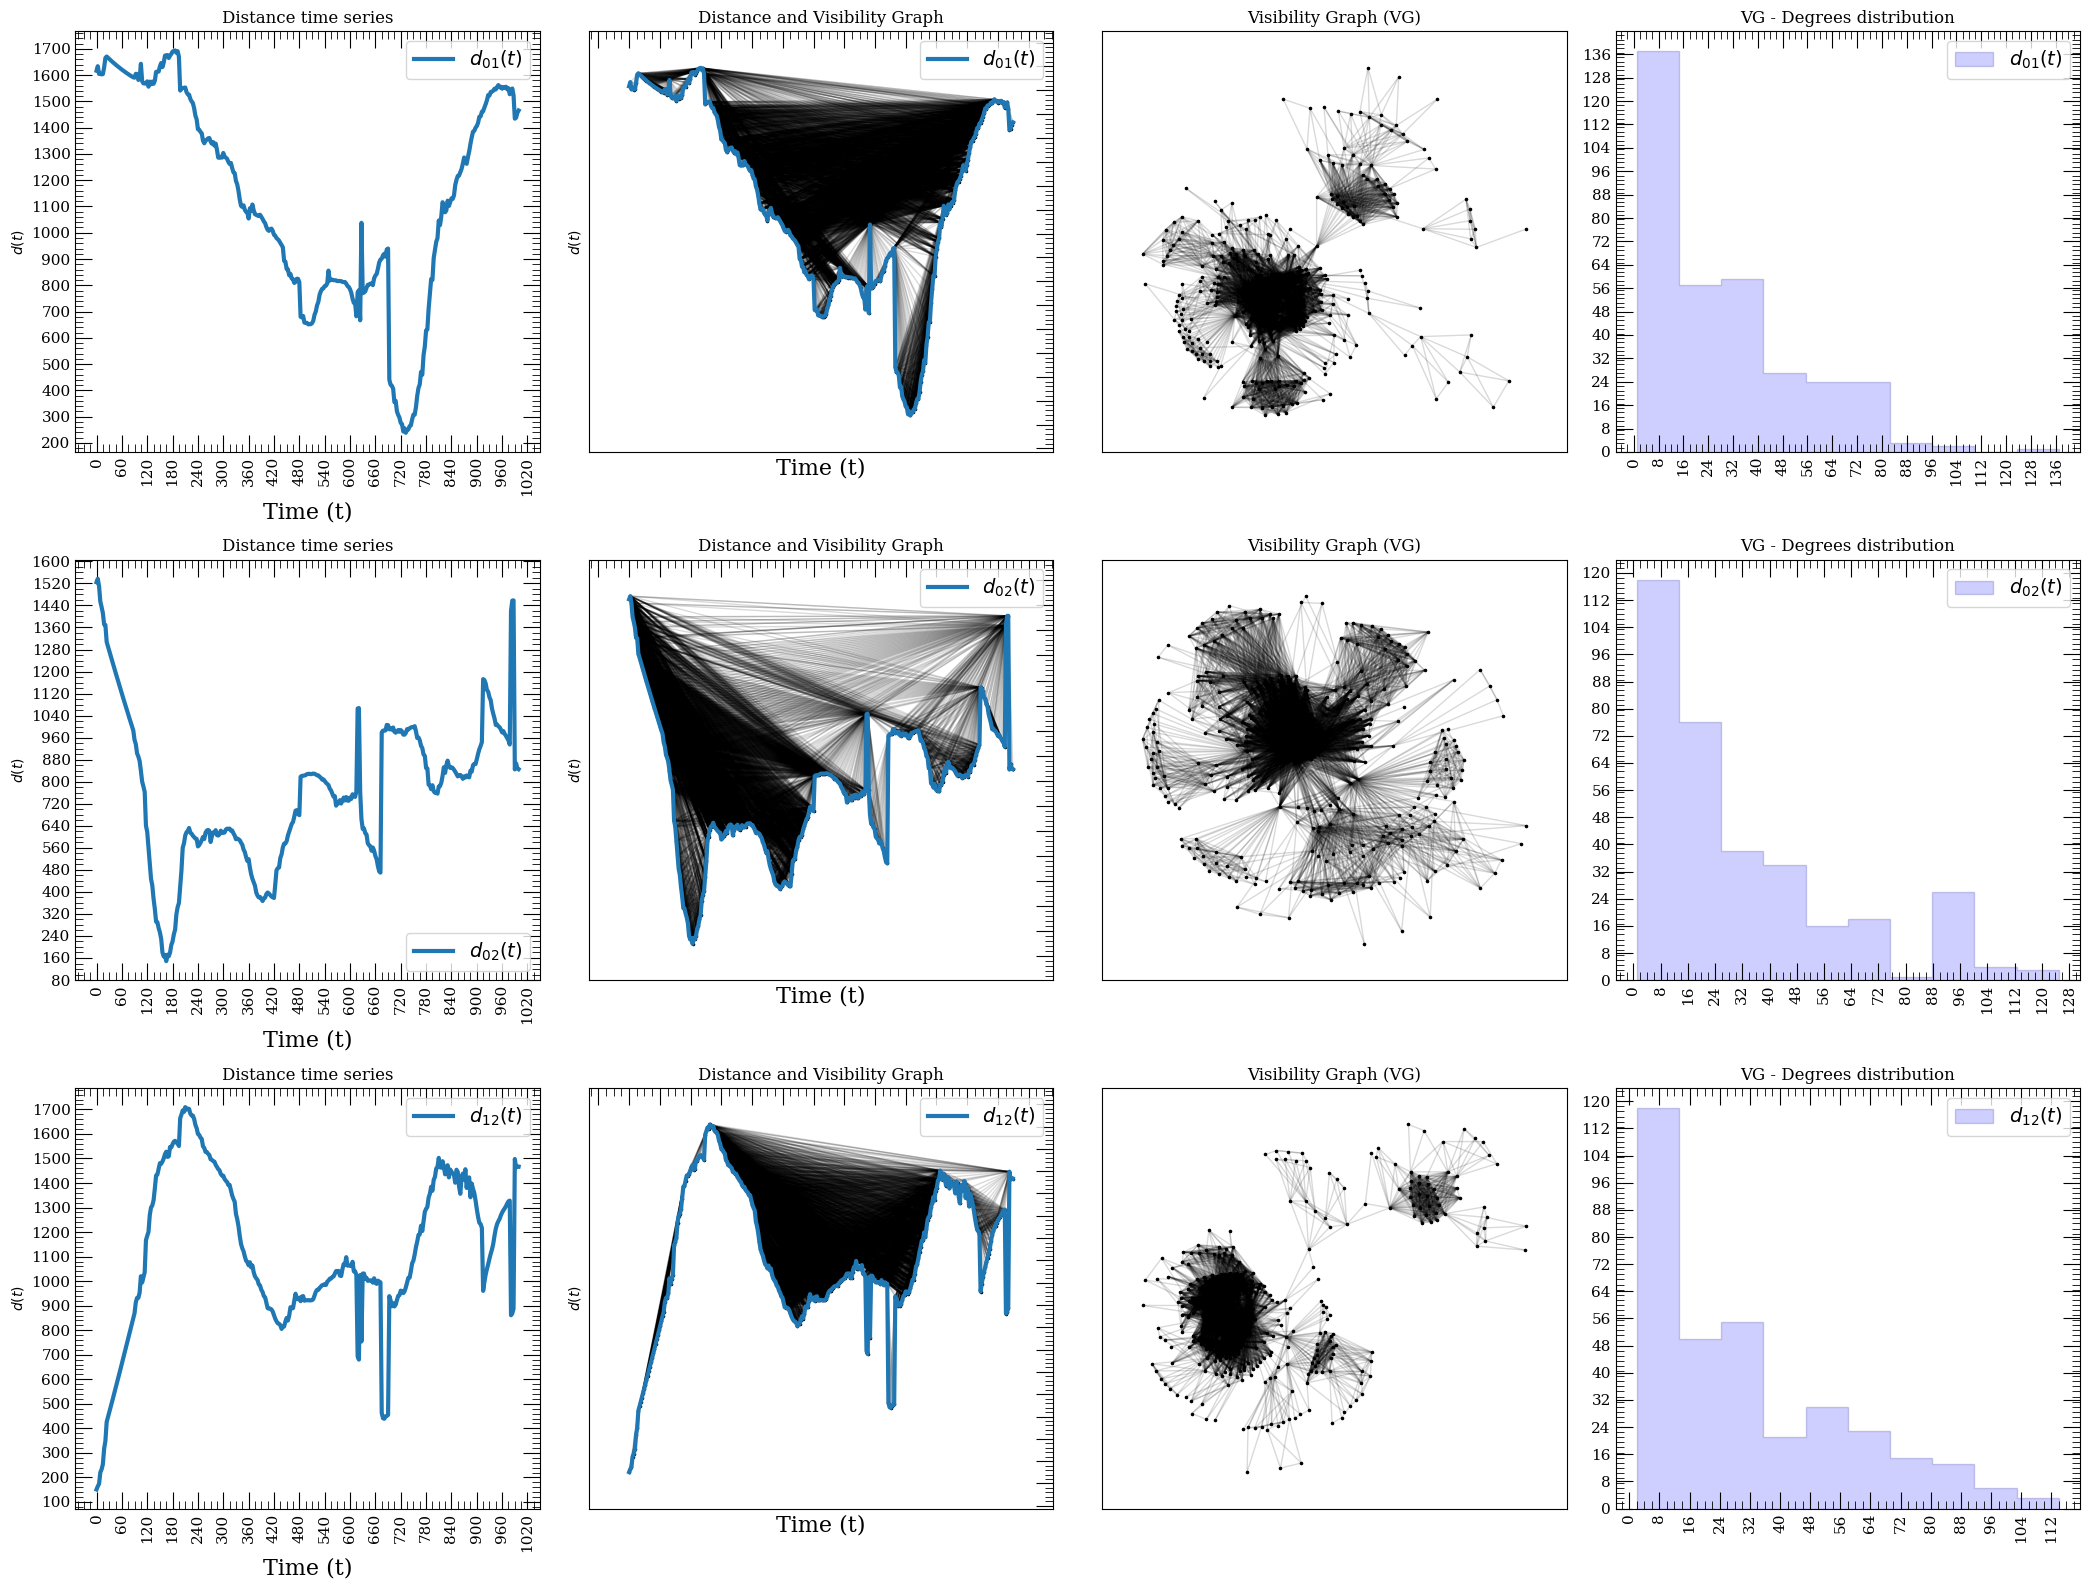

In [9]:
fig_3n

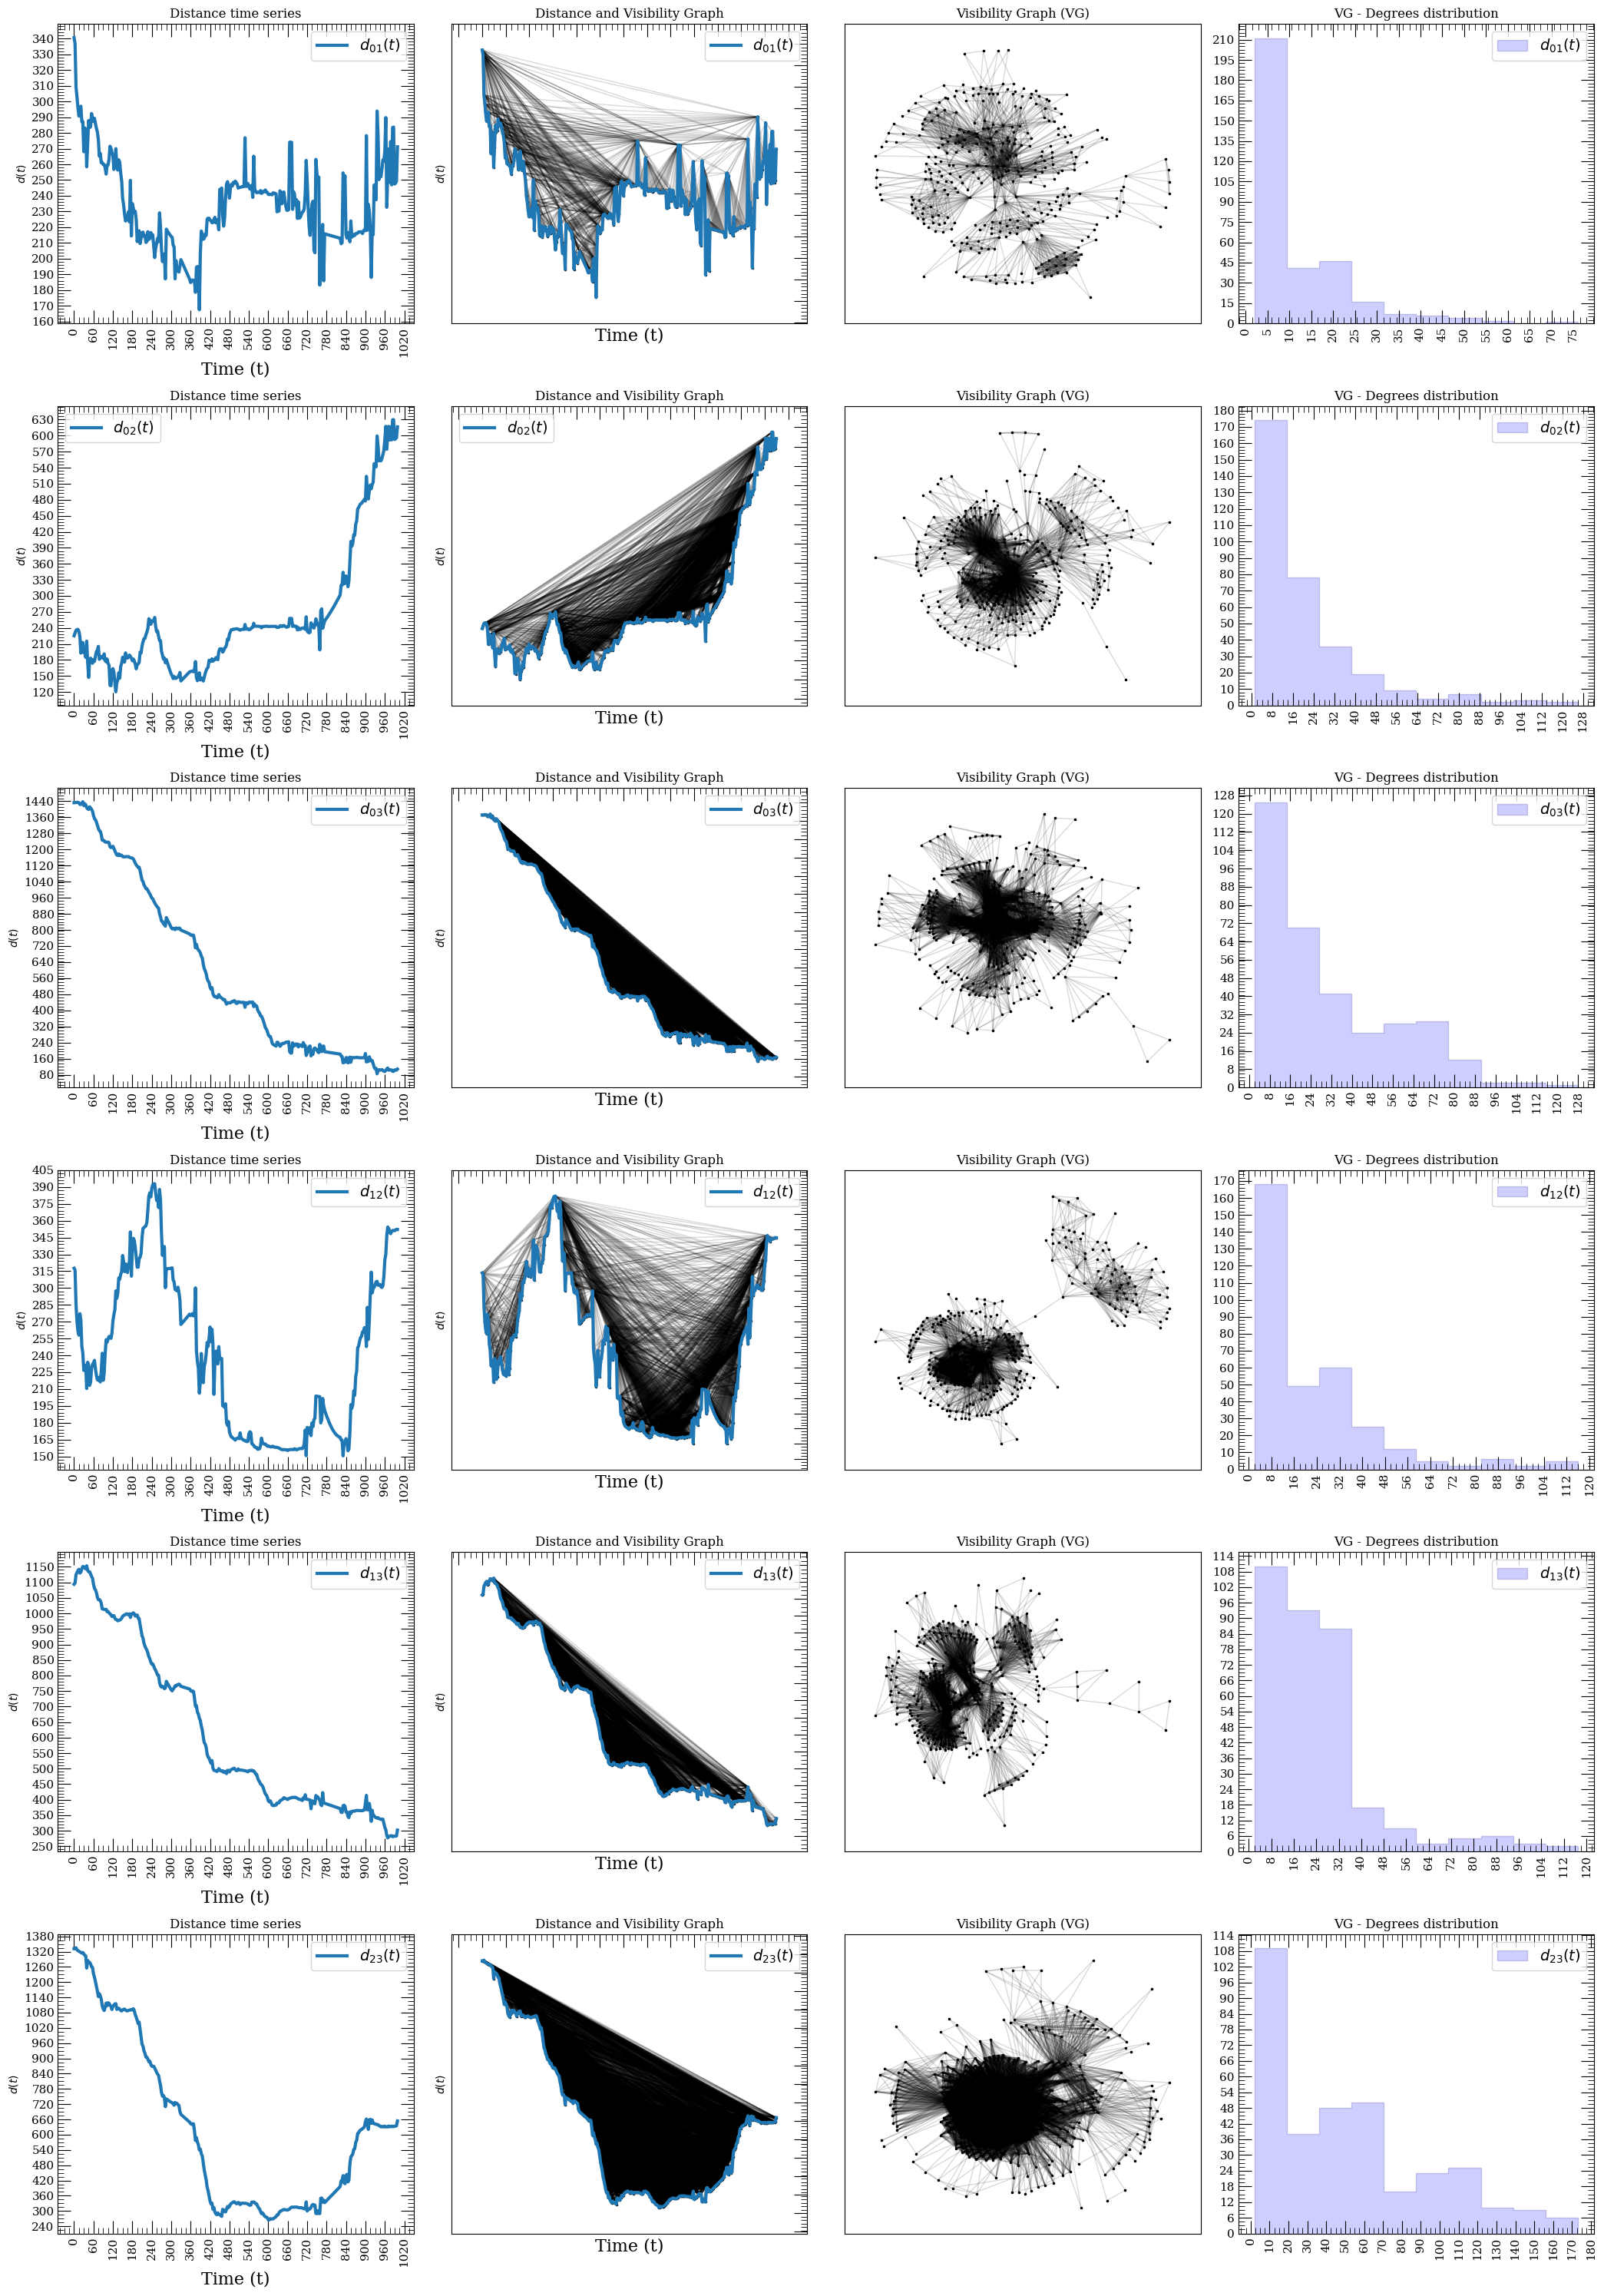

In [10]:
fig_4n

# Hurst exponent, Permutation Entropy and Statistical Complexity

## 1. Hurst Exponent

The Hurst exponent ($H$) is a statistical measure used to evaluate the long-term memory of time series data. It quantifies the tendency of a time series to either:

- Persist in its trend ($H > 0.5$)
- Exhibit a random walk ($H ≈ 0.5$)
- Mean-revert ($H < 0.5$)

The Hurst exponent is estimated using the rescaled range (R/S) analysis:

\begin{equation}
    H = \lim_{T \to \infty} \frac{\log(R/S)}{\log(T)}
\end{equation}

where:

- $R$ is the range of cumulative deviations from the mean
- $S$ is the standard deviation
- $T$ is the time window size

### **Multifractal Detrended Fluctuation Analysis (MF-DFA)**

MF-DFA is an extension of DFA (Detrended Fluctuation Analysis) that measures the **multifractal properties** of a time series by analyzing its scaling behavior at different moments \(q\). The fluctuation function is defined as:

\begin{equation}
    F_q(s) = \left( \frac{1}{N_s} \sum_{\nu=1}^{N_s} F^q(\nu, s) \right)^{\frac{1}{q}}
\end{equation}

where $F(\nu, s)$ is the local detrended fluctuation at segment \(\nu\), and \(s\) is the window size.

## 2. Permutation Entropy

Permutation Entropy ($PE$) is a nonlinear measure of time series complexity introduced by Bandt & Pompe (2002). It quantifies the randomness in a time series by analyzing the frequency of ordinal patterns of a given length.

Given a time series $X = \{x_1, x_2, ..., x_N\}$ and an embedding dimension $d$, we extract ordinal patterns by ranking the values within sliding windows of size $\tau$. The permutation entropy is then computed as:

\begin{equation}
    H_p = - \sum p(\pi) \log p(\pi)
\end{equation}

where $p(\pi)$ is the probability of each ordinal pattern $\pi$.

## 3. Statistical complexity

Statistical complexity measures the balance between disorder and structure in a system. It complements entropy by identifying structured patterns within randomness.

A widely used definition is the **Jensen-Shannon complexity**, which combines permutation entropy and disequilibrium:

\begin{equation}
    C_J = H_p \cdot Q_J
\end{equation}

where $Q_J$ is the Jensen-Shannon divergence measuring disequilibrium.

---

## **References**

- Bandt, C., & Pompe, B. (2002). Permutation entropy: A natural complexity measure for time series.
- Rosso, O. A., et al. (2007). Distinguishing noise from chaos.
- Ribeiro, H. V., et al. (2012). Characterizing time series through complexity-entropy curves.
- `ordpy`: A Python library for ordinal pattern analysis.


In [11]:
q = 2
dx = 3
taux = 1
upper_time = 2000

df_hurst_2n = ecna.estimate_hurst_and_complexity_df(
    df=df_2n,
    filter_step=3,
    dx=dx,
    taux=taux,
    log_path="../logs",
    log_filename="log_proof_2",
    verbose=1,
    arg_list=(q, 0, upper_time)
)

df_hurst_3n = ecna.estimate_hurst_and_complexity_df(
    df=df_3n,
    filter_step=3,
    dx=dx,
    taux=taux,
    log_path="../logs",
    log_filename="log_proof_3",
    verbose=1,
    arg_list=(q, 0, upper_time)
)

df_hurst_4n = ecna.estimate_hurst_and_complexity_df(
    df=df_4n,
    filter_step=1,
    dx=dx,
    taux=taux,
    log_path="../logs",
    log_filename="log_proof_4",
    verbose=1,
    arg_list=(q, 0, upper_time)
)

Estimate distances for: 2 ids
- Pair: 01
-- Skipped data every 3 points

Estimate distances for: 3 ids
- Pair: 01
- Pair: 02
- Pair: 12
-- Skipped data every 3 points

Estimate distances for: 4 ids
- Pair: 01
- Pair: 02
- Pair: 03
- Pair: 12
- Pair: 13
- Pair: 23
-- Skipped data every 1 points



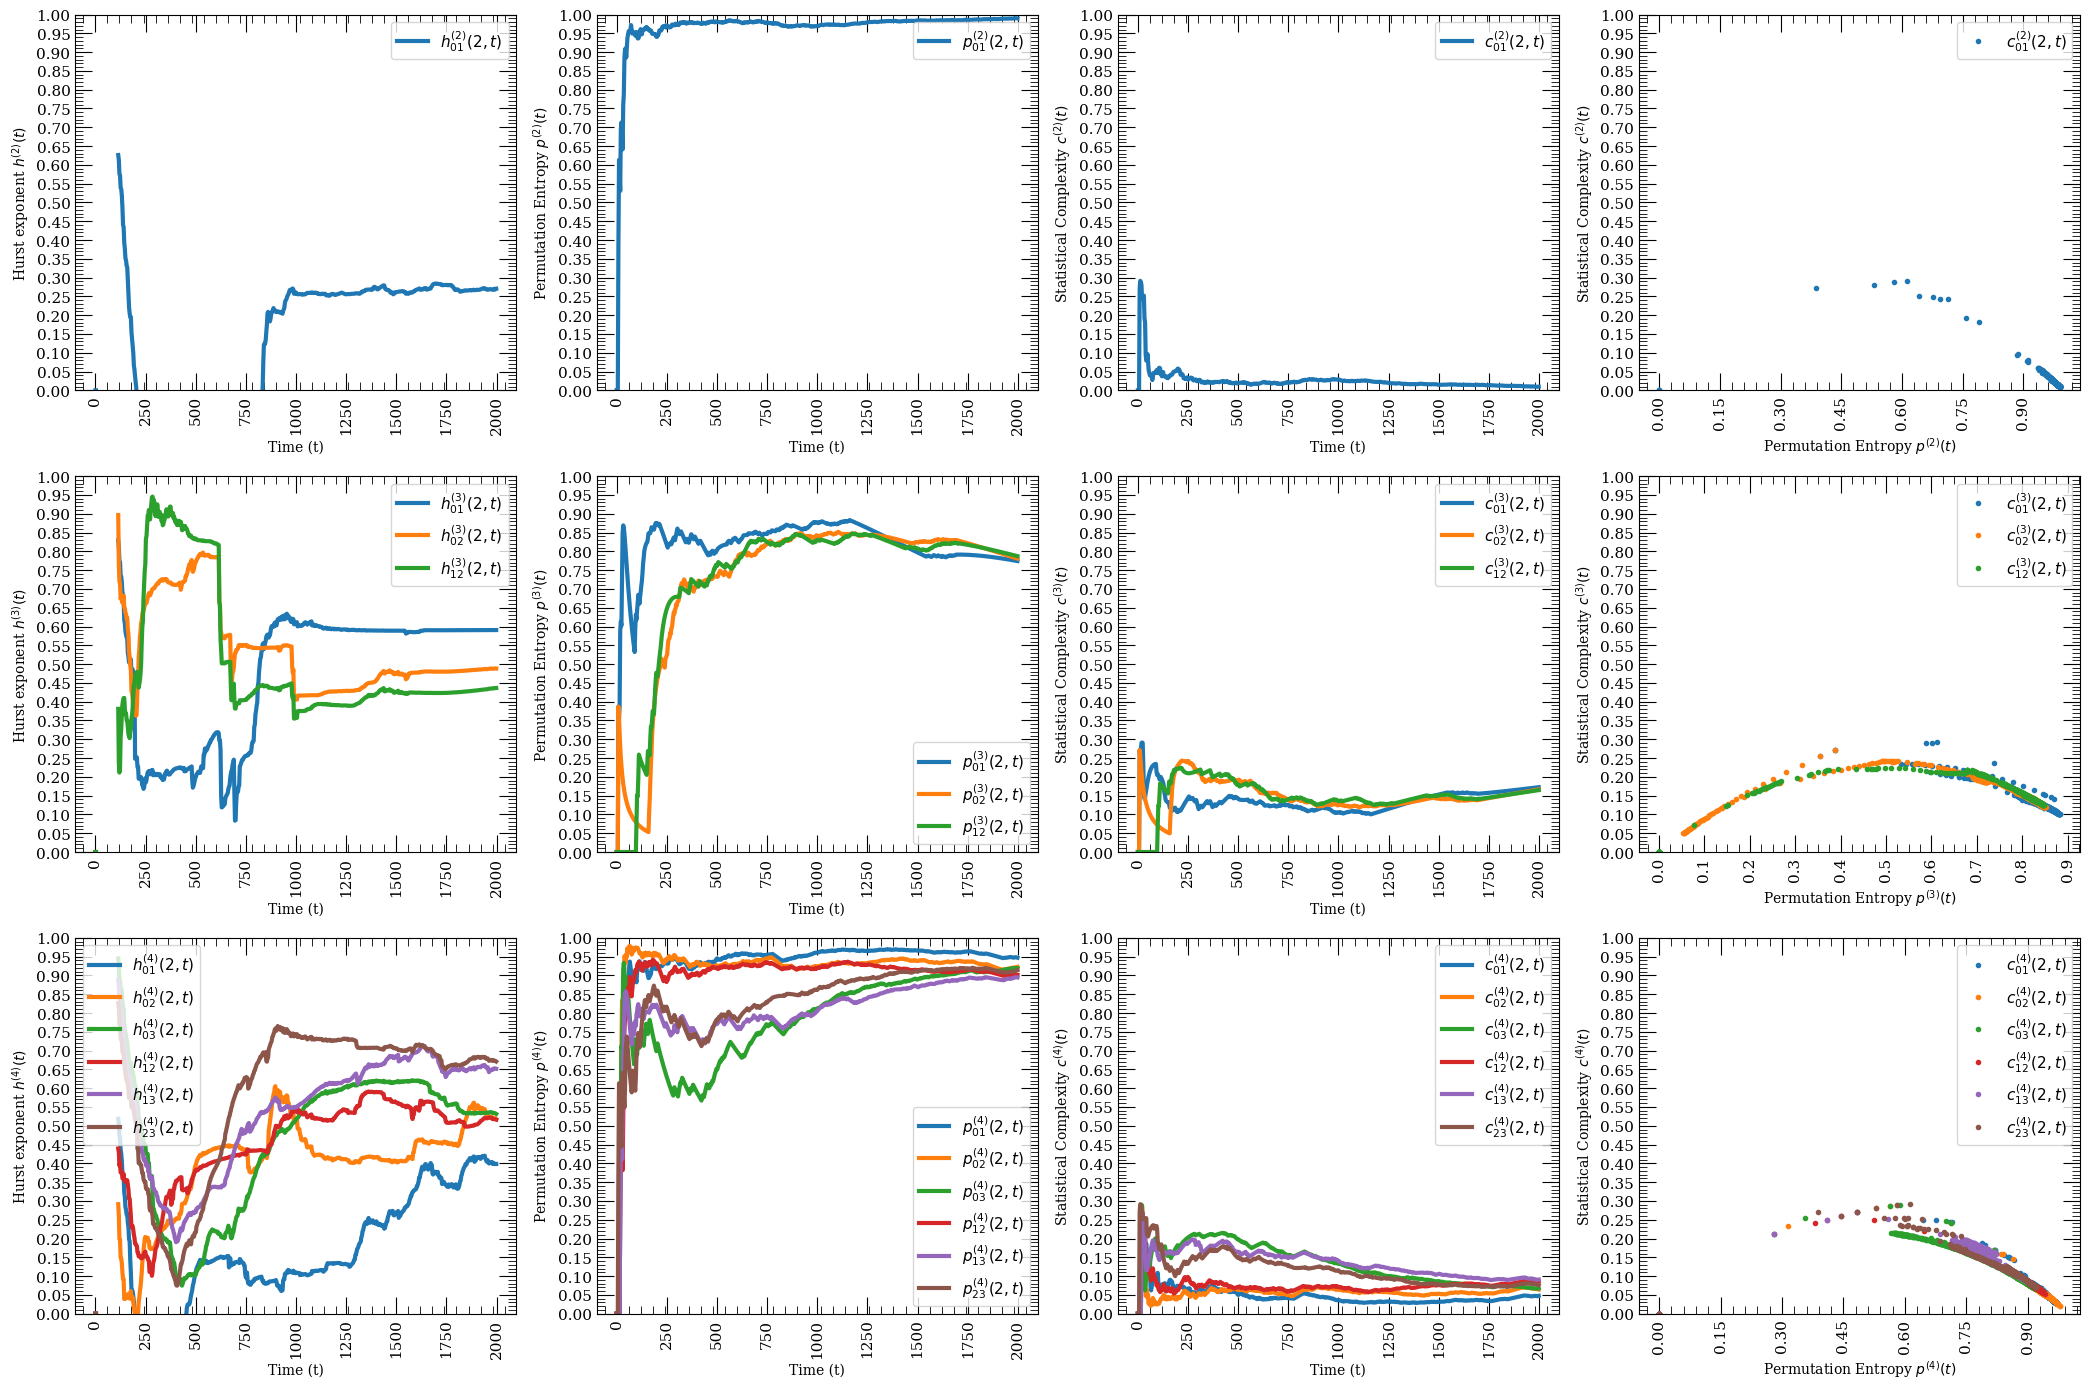

In [21]:
n_x_breaks, n_y_breaks = 10, 20
fig, axes = plt.subplots(3, 4, figsize=(21, 14))

# 2n --------------------------------------------------------------------------
for id_ in df_hurst_2n["id_pair"].unique():
    for q in df_hurst_2n["q_order"].unique():
        # Hurst for 2 individuals ----
        mask = (df_hurst_2n["id_pair"] == id_)
        t_2n = df_hurst_2n[mask]["time"].values
        h_2n = df_hurst_2n[mask]["hurst"].values
        p_2n = df_hurst_2n[mask]["permutation_entropy"].values
        c_2n = df_hurst_2n[mask]["statistical_complexity"].values

        # Plot for 2 individuals ----
        axes[0, 0].plot(t_2n, h_2n, label="$h_{{{}}}^{{(2)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[0, 1].plot(t_2n, p_2n, label="$p_{{{}}}^{{(2)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[0, 2].plot(t_2n, c_2n, label="$c_{{{}}}^{{(2)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[0, 3].plot(p_2n, c_2n, label="$c_{{{}}}^{{(2)}}({},t)$".format(id_, q), ls="", ms=3, marker="o")

# 3n --------------------------------------------------------------------------
for id_ in df_hurst_3n["id_pair"].unique():
    for q in df_hurst_3n["q_order"].unique():
        # Hurst for 3 individuals ----
        mask = (df_hurst_3n["id_pair"] == id_)
        t_3n = df_hurst_3n[mask]["time"].values
        h_3n = df_hurst_3n[mask]["hurst"].values
        p_3n = df_hurst_3n[mask]["permutation_entropy"].values
        c_3n = df_hurst_3n[mask]["statistical_complexity"].values

        # Plot for 3 individuals ----
        axes[1, 0].plot(t_3n, h_3n, label="$h_{{{}}}^{{(3)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[1, 1].plot(t_3n, p_3n, label="$p_{{{}}}^{{(3)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[1, 2].plot(t_3n, c_3n, label="$c_{{{}}}^{{(3)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[1, 3].plot(p_3n, c_3n, label="$c_{{{}}}^{{(3)}}({},t)$".format(id_, q), ls="", ms=3, marker="o")
# 4n --------------------------------------------------------------------------
for id_ in df_hurst_4n["id_pair"].unique():
    for q in df_hurst_4n["q_order"].unique():
        # Hurst for 4 individuals ----
        mask = (df_hurst_4n["id_pair"] == id_)
        t_4n = df_hurst_4n[mask]["time"].values
        h_4n = df_hurst_4n[mask]["hurst"].values
        p_4n = df_hurst_4n[mask]["permutation_entropy"].values
        c_4n = df_hurst_4n[mask]["statistical_complexity"].values

        # Plot for 4 individuals ----
        axes[2, 0].plot(t_4n, h_4n, label="$h_{{{}}}^{{(4)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[2, 1].plot(t_4n, p_4n, label="$p_{{{}}}^{{(4)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[2, 2].plot(t_4n, c_4n, label="$c_{{{}}}^{{(4)}}({},t)$".format(id_, q), ls="solid", lw=3)
        axes[2, 3].plot(p_4n, c_4n, label="$c_{{{}}}^{{(4)}}({},t)$".format(id_, q), ls="", ms=3, marker="o")

# Plot for 2 individuals ----
axes[0, 0].set_ylabel("Hurst exponent $h^{{(2)}}(t)$")
axes[0, 1].set_ylabel("Permutation Entropy $p^{{(2)}}(t)$")
axes[0, 2].set_ylabel("Statistical Complexity $c^{{(2)}}(t)$")
axes[0, 3].set_ylabel("Statistical Complexity $c^{{(2)}}(t)$")
axes[0, 0].set_xlabel("Time (t)")
axes[0, 1].set_xlabel("Time (t)")
axes[0, 2].set_xlabel("Time (t)")
axes[0, 3].set_xlabel("Permutation Entropy $p^{{(2)}}(t)$")
# axes[0].set_title("Hurst between pairs {}".format(video_2n))

# Plot for 3 individuals ----
axes[1, 0].set_ylabel("Hurst exponent $h^{{(3)}}(t)$")
axes[1, 1].set_ylabel("Permutation Entropy $p^{{(3)}}(t)$")
axes[1, 2].set_ylabel("Statistical Complexity $c^{{(3)}}(t)$")
axes[1, 3].set_ylabel("Statistical Complexity $c^{{(3)}}(t)$")
axes[1, 0].set_xlabel("Time (t)")
axes[1, 1].set_xlabel("Time (t)")
axes[1, 2].set_xlabel("Time (t)")
axes[1, 3].set_xlabel("Permutation Entropy $p^{{(3)}}(t)$")
# axes[1].set_title("Hurst between triplets {}".format(video_3n))

# Plot for 4 individuals ----
axes[2, 0].set_ylabel("Hurst exponent $h^{{(4)}}(t)$")
axes[2, 1].set_ylabel("Permutation Entropy $p^{{(4)}}(t)$")
axes[2, 2].set_ylabel("Statistical Complexity $c^{{(4)}}(t)$")
axes[2, 3].set_ylabel("Statistical Complexity $c^{{(4)}}(t)$")
axes[2, 0].set_xlabel("Time (t)")
axes[2, 1].set_xlabel("Time (t)")
axes[2, 2].set_xlabel("Time (t)")
axes[2, 3].set_xlabel("Permutation Entropy $p^{{(4)}}(t)$")
# axes[2].set_title("Hurst between quadruples {}".format(video_4n))

# Other plots settings ----
for j in [0, 1, 2]:
    for k in [0, 1, 2, 3]:
        axes[j, k].legend(fontsize=11)
        axes[j, k].tick_params(which="major", direction="in", top=True, right=True, labelsize=11, length=12)
        axes[j, k].tick_params(which="minor", direction="in", top=True, right=True, labelsize=11, length=6)
        axes[j, k].xaxis.set_major_locator(mtick.MaxNLocator(n_x_breaks))
        axes[j, k].xaxis.set_minor_locator(mtick.MaxNLocator(4 * n_x_breaks))
        axes[j, k].yaxis.set_major_locator(mtick.MaxNLocator(n_y_breaks))
        axes[j, k].yaxis.set_minor_locator(mtick.MaxNLocator(5 * n_y_breaks))
        axes[j, k].tick_params(axis = "x", labelrotation = 90)
        axes[j, k].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [ ]:
# TODO:
# - Compare same N and same Sex proportion
# - Estimate Hurst exponent using a moving window (at the moment cumulative window)
# - Distribution of resting time using distance threshold
# - How circadian clock affects the cockroaches behaviour
# - Compare mu of power-law for jump length (foraging book)
# - Heterogeneity is greater than 1 for heavy tails

# Tracked all frames and estimate a proportion of no moving frames
# Explore SINDY Python package

# Test

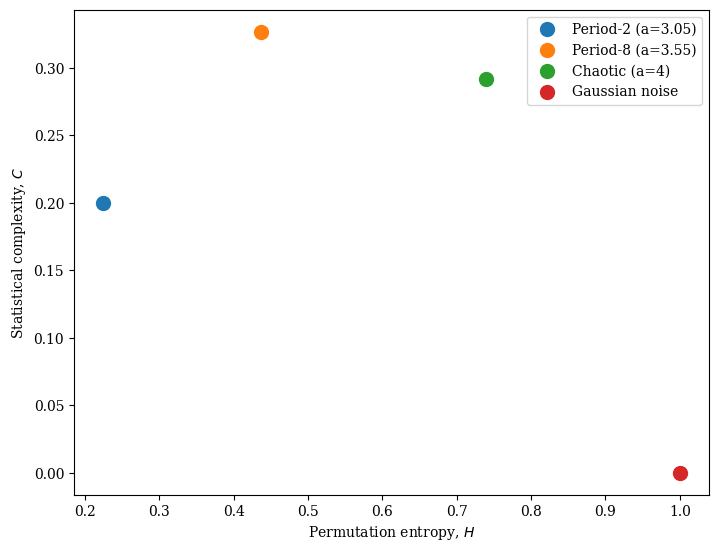

In [14]:
import numpy as np
import ordpy
from matplotlib import pylab as plt

def logistic(a=4, n=100000, x0=0.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = a*x[i]*(1-x[i])
    return(x)

time_series = [logistic(a) for a in [3.05, 3.55, 4]]
time_series += [np.random.normal(size=100000)]

HC = [ordpy.complexity_entropy(series, dx=4) for series in time_series]


f, ax = plt.subplots(figsize=(8.19, 6.3))

for HC_, label_ in zip(HC, ['Period-2 (a=3.05)',
                            'Period-8 (a=3.55)',
                            'Chaotic (a=4)',
                            'Gaussian noise']):
    ax.scatter(*HC_, label=label_, s=100)

ax.set_xlabel('Permutation entropy, $H$')
ax.set_ylabel('Statistical complexity, $C$')

ax.legend()

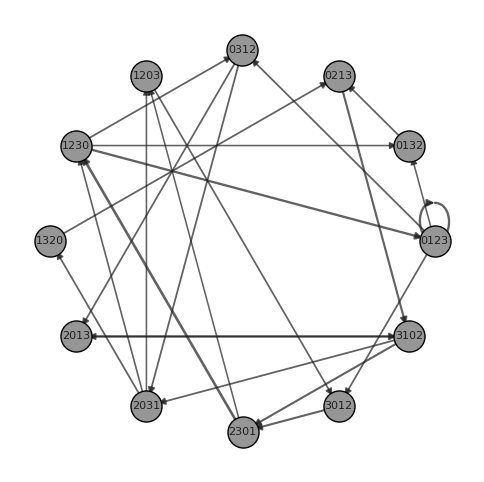

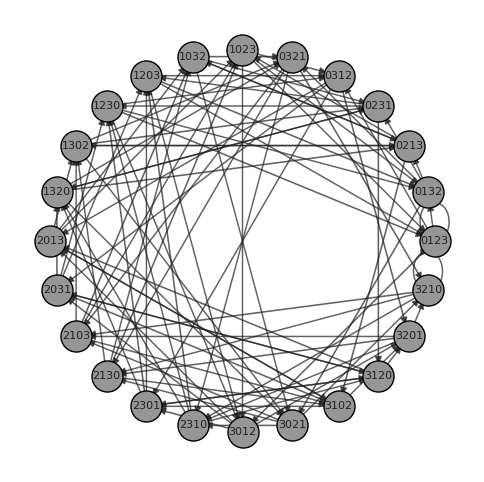

In [15]:
import numpy as np
import networkx as nx
import ordpy
import matplotlib.pyplot as plt

# Generate logistic map time series
def logistic(a=4, n=100000, x0=0.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n - 1):
        x[i + 1] = a * x[i] * (1 - x[i])
    return x

time_series = [logistic(a=4), np.random.normal(size=100000)]

# Compute ordinal networks
networks = [ordpy.ordinal_network(series, dx=4) for series in time_series]

# Function to create a NetworkX graph
def create_nx_graph(vertex_list, edge_list, edge_weight):
    G = nx.DiGraph()
    
    # Add nodes
    for v in vertex_list:
        G.add_node(v)

    # Add edges with weights
    for (source, target), weight in zip(edge_list, edge_weight):
        G.add_edge(source, target, weight=weight)

    return G

# Create NetworkX graphs
graphs = [create_nx_graph(v, e, w) for v, e, w in networks]

# Function to plot NetworkX graph
def nxplot(G):
    plt.figure(figsize=(6, 6))
    
    # Define layout
    pos = nx.circular_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='#969696', edgecolors='black')
    
    # Draw edges with thickness proportional to weight
    edges = G.edges(data=True)
    edge_widths = [1 + 8 * d['weight'] for _, _, d in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, edge_color='#202020', alpha=0.7, arrows=True)
    
    # Draw labels
    labels = {node: node.replace('|', '') for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='#202020')

    plt.axis('off')
    plt.show()

# Plot the graphs
for g in graphs:
    nxplot(g)


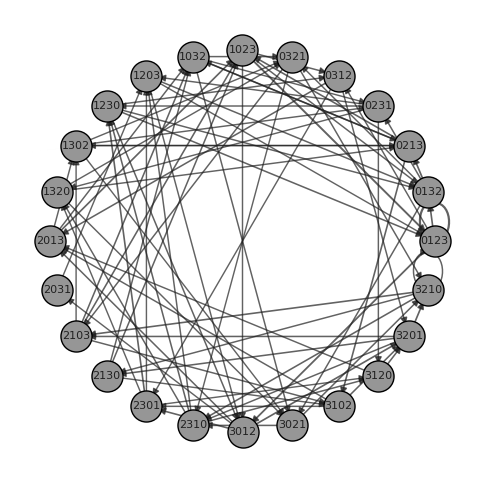

In [16]:
v, e, w = ordpy.ordinal_network(df_distances_2n[df_distances_2n["time"] < 1000]["distance"].values, dx=4)
g = create_nx_graph(v, e, w)
nxplot(g)